# <u> Sentiment Analysis of Yelp Reviews Dataset </u>

* Mishita Agarwal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <u> Data Set Description </u>


The yelp_review.csv dataset contains the following columns.  

<ul>
<li><b>review_id</b>: Every review has a review id
<li><b>user_id</b>: User posts the reviews and have their own unique user id.
<li><b>business_id</b>: The business id is the unique identifier of the the type of business(restaurants, etc).
<li><b>stars</b>: Star rating given by the user for the services or products. 
<li><b>date</b>: The date when the review is posted
<li><b>text</b>: Texts are the reviews posted by the user[the main column for sentiment analysis.]
<li><b>useful,funny,cool</b>: Any user can give "thumbsup" to any review if he/she founds that review cool, funny or useful. Intended for declaring the review of the day. 
</ul>

Important columns in yelp_business.csv column

<ul>
<li><b>name</b>: Store/shop or business name.
<li><b>review_count</b>: The total review counts for each store.
<li><b>stars</b>: float ratings of orignal stars rounded to half points. Not given by the users.
<li><b>categories</b>: The type of business. 

</ul>

In [2]:
'''The orignal csv file is very large and takes a long time to run everytime, so I sampled the orignal file and saved the state
of sampled file using pickle package of python to get the saved state everytime. You can run the orignal file, if required.'''
#reviews = pd.read_csv("yelp_review.csv")

In [ ]:
# The random sampling of reviews dataset. 
#reviews = reviews.sample(frac = 0.1)

In [6]:
# Dumped the sampled file using pickle. 
import pickle 
# pickle.dump(reviews, open( "sampled_reviews.p", "wb" ))


In [7]:
reviews = pickle.load( open( "sampled_reviews.p", "rb" ) )

In [8]:
reviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
331045,lfUu9sUtxC9xnc3QNGVdAQ,R6vb0FtmClhfwajs_AuusQ,VBJwRxOAtvjy7taLXEjmfg,3,2017-08-27,If you are a fan of FRIED PICKLES this is the ...,0,0,0
3200099,rmV9bYF9d0tm9kCJs1kZlg,RZSdmC1g3Sb6J4MSbjKjuA,4JNXUYY8wbaaDmk3BPzlWw,2,2014-08-08,I don't get the hype on this place. The servic...,0,3,0
2891782,-aEpIZchSGQz1fpjmeQJPw,kzaWUwXdTSPOBKK7qtFZpQ,S37sKRRfkhFZRpxaYzWo_A,4,2014-08-11,I was intrigued by the reviews that indicated ...,0,1,1
3081119,7PmSfe22XnkGBBF1PMuWwA,qLkvFGPomqF4qbWlT1IKqw,JLbgvGM4FXh9zNP4O5ZWjQ,5,2017-05-26,We went to celebrate my son's 13th birthday. M...,0,0,0
4487231,jvJJPv-QCwOwNZdp-6uzjA,wr8HTsnRoelIwUg9k3Owug,1-L3RfFTq4tA0kl73K1l0g,5,2017-12-07,I had the chicken tortilla soup and my partner...,0,0,0


In [9]:
business = pd.read_csv("yelp_business.csv")

In [12]:
business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Data Analysis of Business and Review dataset is as follows:

# </u> What are top 20 Business Categories? <u/>

('Maximum number of category', 36)
('Median category of business', 3.0)


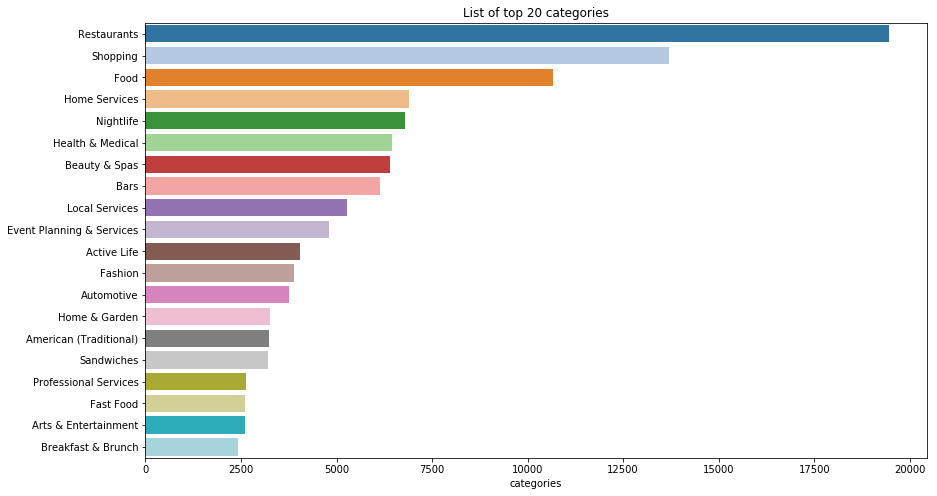

In [13]:
print('Maximum number of category',business['categories'].str.split(';').str.len().max())
print('Median category of business',business['categories'].str.split(';').str.len().median())
corpus = ' '.join(business['categories'])

corpus = pd.DataFrame(corpus.split(';'),columns=['categories'])
cnt = corpus['categories'].value_counts().to_frame()[:20]
plt.figure(figsize=(14,8))
sns.barplot(cnt['categories'], cnt.index, palette = 'tab20')
plt.title('List of top 20 categories');
plt.show()

# </u> Which year and month has the highest number of reviews ? <u/>

In [14]:
reviews['date'] = pd.to_datetime(reviews['date'])
reviews['year'] = reviews['date'].dt.year
reviews['month'] = reviews['date'].dt.month

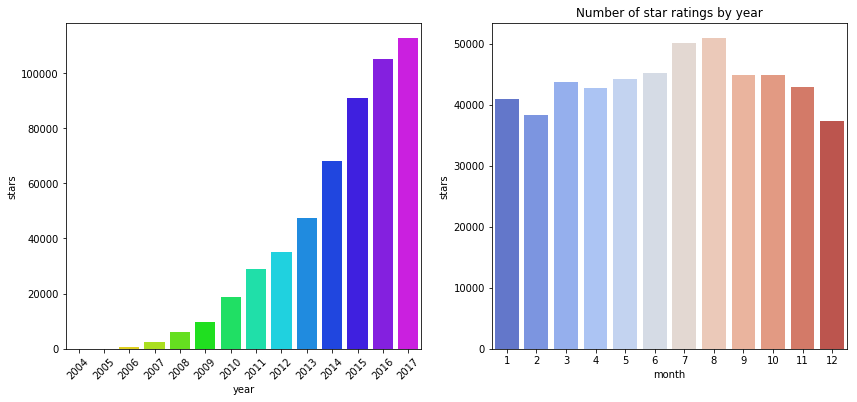

In [15]:
f,ax = plt.subplots(1,2, figsize = (14,6))
ax1,ax2 = ax.flatten()
cnt = reviews.groupby('year').count()['stars'].to_frame()
sns.barplot(cnt.index, cnt['stars'],palette = 'gist_rainbow', ax=ax1)

for ticks in ax1.get_xticklabels():
    ticks.set_rotation(45)

cnt = reviews.groupby('month').count()['stars'].to_frame()
sns.barplot(cnt.index, cnt['stars'],palette = 'coolwarm', ax = ax2)
plt.title("Number of star ratings by year")
plt.show()

# </u> What is the distribution of star ratings in the Restaurant category(the top category)?  <u/>

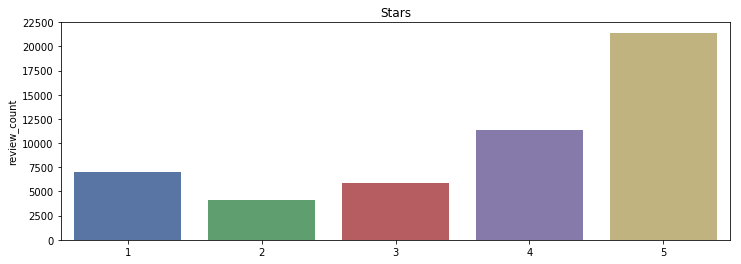

In [17]:
innJoinResult = reviews.merge(business, left_on = 'business_id', right_on='business_id')
corpus = ' '.join(innJoinResult['categories'])
corpus = pd.DataFrame(corpus.split(';'),columns=['categories'])
innJoinResult['categories']= corpus['categories']
grp_innerjoin = innJoinResult[innJoinResult.categories == 'Restaurants'].groupby('stars_x').count()['review_count']
plt.figure(figsize=(12,4))
cnt = innJoinResult[innJoinResult.categories == 'Restaurants'].groupby('stars_x').count()['review_count'].to_frame()
ax = sns.barplot(cnt.index,cnt['review_count'] , palette = 'deep')
ax.set_xlabel('')
plt.title('Stars')
plt.show()

Percentage distribution of ratings through a pie-chart representation

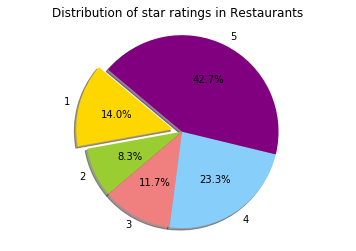

In [18]:
labels = '1', '2', '3', '4','5'
sizes = [73419, 43917, 61757, 122549, 224525]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("Distribution of star ratings in Restaurants")

plt.show()

#### </u> Process to train the model is as follows:  <u/>

In [25]:
# I have converted the star rating into review sentiment(positive or negative for sentiment analysis.) 
# Star rating 1,2,3 is binned into neg and rating 4,5 binned into pos. 
reviews['review_sentiment'] = np.nan
reviews.loc[(reviews['stars'] >=1) & (reviews['stars'] <4), 'review_sentiment'] = 'neg'
reviews.loc[(reviews['stars'] >=4) & (reviews['stars'] <6), 'review_sentiment'] = 'pos'

In [37]:
'''Creating the dependent and independent columns. X is an indenpendent variable and y is a dependent variable, I will use only
"review sentiment" as a dependent variable for fitting into the model. Attribute "stars" is added because as per the feedback, 
you preferred to also see the distribution of ratings correctly classified or misclassified as positive or negative. This "star" is
not used for fitting into model.'''

X = reviews['text']

y = reviews[['review_sentiment', 'stars']]


In [38]:
''' This function is written to preprocess the text, the function will perform the following tasks:
    1. Remove any links(http/https) from the reviews text. 
    2. Remove all the punctuations or other signs other than numbers and letters(both small and capital)
    3. As numbers do not contibute in classifying any review, the numbers will be replaced by 'd'. Later, useless words will be
       by stopwords removal feature in count-vectorizer in sklearn. 
''' 
import re
def text_process(text):
    text = text.strip().lower()   
    text = re.sub(r'\bhttp.+?( |$)', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9 ]', ' ', text)
    text = re.sub(r'[0-9]', 'd', text) 
    text = re.sub(r'\s+', ' ', text) 
    return text

In [39]:
# The function is applied to independent variable X, the function takes everyline and clean the text of reviews. 
X = [text_process(review) for review in X]

In [40]:
# Train and Test sets are prepared with 10% of samples in the Test set and remaining in Training set. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_tr, y_tst = train_test_split(X, y, test_size=0.1)

In [41]:
# X_train, X_test, y_train, y_test will be used for modelling. 
y_train = y_tr['review_sentiment']
y_test = y_tst['review_sentiment']
y_test_star = y_tst['stars'] # used to see actual star ratings distrubution identified as pos and neg. 
y_test_star = y_test_star.values


In [42]:
'''Every machine learning model takes vectors to fit the model, therefore, countvectorizer followed by tf-idf is used to represent 
the reviews in the form of vectors. dumb_tokenizor is the function for tokenzing the reviews and given as a parameter 
to countvectorize'''

def dumb_tokenizer(t):
    return t.split()


In [43]:
# Countvectorize training data
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(tokenizer=dumb_tokenizer, stop_words='english',max_df=0.9, min_df=3)
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(473550, 70201)

In [44]:
# Generate tfidf matrix of countvectorized data
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape


(473550, 70201)

In [45]:
# vectorized and tfidf of test data
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_test_tfidf.shape

(52617, 70201)

# </u> Results of Multinomial and Logistic Regression for count vectorized and tfidf models separately <u/> 

In [46]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import confusion_matrix, classification_report

clf = MultinomialNB()
clf.fit(X_train_counts, y_train)
predicted = clf.predict(X_test_counts)
print('Classification report with MNB using tf as term encoding\n')
print(classification_report(y_test, predicted, target_names=['neg', 'pos']))
print(confusion_matrix(y_test, predicted))

clf.fit(X_train_tfidf, y_train)
predicted = clf.predict(X_test_tfidf)
print('Classification report with MNB using tf-idf as term encoding\n')
print(classification_report(y_test, predicted, target_names=['neg', 'pos']))
print(confusion_matrix(y_test, predicted))


clf = lr()
clf.fit(X_train_counts, y_train)
predicted = clf.predict(X_test_counts)
print('Classification report with LR using tf as term encoding\n')
print(classification_report(y_test, predicted, target_names=['neg', 'pos']))
print(confusion_matrix(y_test, predicted))

clf.fit(X_train_tfidf, y_train)
predicted = clf.predict(X_test_tfidf)
print('Classification report with LR using tf-idf as term encoding\n')
print(classification_report(y_test, predicted, target_names=['neg', 'pos']))
print(confusion_matrix(y_test, predicted))

Classification report with MNB using tf as term encoding

             precision    recall  f1-score   support

        neg       0.81      0.76      0.79     17890
        pos       0.88      0.91      0.89     34727

avg / total       0.86      0.86      0.86     52617

[[13671  4219]
 [ 3263 31464]]
Classification report with MNB using tf-idf as term encoding

             precision    recall  f1-score   support

        neg       0.89      0.65      0.75     17890
        pos       0.84      0.96      0.90     34727

avg / total       0.86      0.85      0.85     52617

[[11607  6283]
 [ 1375 33352]]
Classification report with LR using tf as term encoding

             precision    recall  f1-score   support

        neg       0.86      0.80      0.83     17890
        pos       0.90      0.93      0.92     34727

avg / total       0.89      0.89      0.89     52617

[[14397  3493]
 [ 2338 32389]]
Classification report with LR using tf-idf as term encoding

             precision  

# </u> Distribution of star ratings corrrectly and incorrectly classified as pos or neg <u/> 

In [47]:
def classification_report_star_rating(predictions, star_ratings):
    classified_as_positive = {'1':0, '2':0, '3':0, '4':0, '5':0}
    classified_as_negative = {'1':0, '2':0, '3':0, '4':0, '5':0}
    for i in range(len(predictions)):
        if predictions[i] == 'pos':
            classified_as_positive[str(star_ratings[i])] += 1
        else:
            classified_as_negative[str(star_ratings[i])] += 1
    print("classified as positive:", classified_as_positive)
    print("classified as negative:", classified_as_negative)

In [48]:
classification_report_star_rating(predicted, y_test_star)

('classified as positive:', {'1': 321, '3': 2561, '2': 476, '5': 21805, '4': 10777})
('classified as negative:', {'1': 7054, '3': 3599, '2': 3879, '5': 548, '4': 1597})


######  </u> Thus we can see that among 1,2,3 star ratings,  3 star ratings have the highest number(2561) which are misclassified as positive. 1-star and 2-star have a much smaller proportion. Similarly 4, 5 star ratings have a very small proportion misclassfied into negative as compared to the correctly classified. <u/>

# </u> Adding dictionary of positive and negative as an additional predictor variable <u/>

In [49]:
## Function for reading pos and neg list
def read_dictionaries(pFile, nFile):
    pos_words = set(text_process(line.strip()) for line in open(pFile))
    neg_words = set(text_process(line.strip()) for line in open(nFile))
    return pos_words, neg_words
pos_words, neg_words = read_dictionaries('pos-words.txt', 'neg-words.txt')

In [50]:
from scipy.sparse import coo_matrix, hstack
def compute_dictionary_features(doc_list):
    num_pos_words, num_neg_words = [], []
    for doc in doc_list:
        words = doc.split()
        num_pos = 0
        num_neg = 0
        for w in words:
            if w in pos_words:
                num_pos += 1
            if w in neg_words:
                num_neg += 1
        num_pos_words.append([num_pos])
        num_neg_words.append([num_neg])
    return num_pos_words, num_neg_words

In [51]:
from scipy.sparse import coo_matrix, hstack
num_pos_words, num_neg_words = compute_dictionary_features(X_train)
print(len(num_pos_words), len(num_neg_words))

(473550, 473550)


In [52]:
# X_train all contains dictionary plus reviews both. 
import numpy as np
X_train_all = hstack([X_train_tfidf, coo_matrix(np.array(num_pos_words)), coo_matrix(np.array(num_neg_words))])
X_train_tfidf.shape


(473550, 70201)

In [53]:
X_train_all.shape 

(473550, 70203)

In [54]:
##### Compute pos, neg word features for test set
num_pos_words, num_neg_words = compute_dictionary_features(X_test)
print(len(num_pos_words), len(num_neg_words))

(52617, 52617)


In [55]:
X_test_all = hstack([X_test_tfidf, coo_matrix(np.array(num_pos_words)), coo_matrix(np.array(num_neg_words))])

In [56]:
clf = lr()
clf.fit(X_train_all, y_train)
predicted = clf.predict(X_test_all)
print('Classification report with LR using tf-idf as term encoding\n')
print(classification_report(y_test, predicted, target_names=['neg', 'pos'], digits=4))
print(confusion_matrix(y_test, predicted))

Classification report with LR using tf-idf as term encoding

             precision    recall  f1-score   support

        neg     0.8718    0.8117    0.8407     17890
        pos     0.9063    0.9385    0.9221     34727

avg / total     0.8946    0.8954    0.8945     52617

[[14522  3368]
 [ 2135 32592]]


#### We can see that even after adding the dictionary, the results are almost the same. 

# </u> Cross Domain sentiment analysis for Yelp and Amazon. 

In [57]:
import io
def read_data(filename):
    labels, reviews_data = [], []    
    with io.open(filename, encoding = 'utf-8') as f:
        for l in f:
            label, review = l.strip().split(" ", 1)
            if label == '__label__2':
                label = 'pos'
            elif label == '__label__1':
                label = 'neg'
            else:
                print('error')
                continue
            labels.append(label)
            reviews_data.append(review)        
    return labels, reviews_data



In [58]:
# labels, reviews_data = read_data('amazon_reviews_data.txt')
amazon_reviews = pickle.load( open( "sampled_amazon_reviews.p", "rb" ))
# labels, reviews_data = amazon_reviews

In [59]:
from collections import Counter
# Counter(labels)
amazon_reviews.head()

,labels,reviews
2379043,pos,"It's conceptually awesome, some shake that's c..."
3708829,neg,Waste of money: Although I haven't actually re...
495682,pos,super pointy and sharp: I now own tweezer man ...
1996551,neg,Doesnt work.: This type of wax does not work f...
1988957,neg,No stars. Can I actually give minus stars?: Th...


In [60]:
amazon_reviews.columns = ['review_sentiment', 'text']
amazon_reviews.head()

,review_sentiment,text
2379043,pos,"It's conceptually awesome, some shake that's c..."
3708829,neg,Waste of money: Although I haven't actually re...
495682,pos,super pointy and sharp: I now own tweezer man ...
1996551,neg,Doesnt work.: This type of wax does not work f...
1988957,neg,No stars. Can I actually give minus stars?: Th...


# Section 1: Cross learning: In this part, only Yelp dataset is used for testing

## </u> Training on Amazon and testing on Yelp

In [61]:
X_amazon = amazon_reviews['text']
y_amazon = amazon_reviews['review_sentiment']

In [62]:
## Applying preprocess functions on amazon reviews
X_amazon = [text_process(text) for text in X_amazon]

In [63]:
def dumb_tokenizer(t):
    return t.split()

In [64]:
# Countvectorize training data
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(tokenizer=dumb_tokenizer, stop_words='english',max_df=0.9, min_df=3)
X_amazon_train_counts = count_vect.fit_transform(X_amazon)
X_amazon_train_counts.shape
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_amazon_train_counts)
X_train_tfidf.shape


(400000, 77480)

In [66]:
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_test_tfidf.shape

(52617, 77480)

In [67]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import confusion_matrix, classification_report
clf = lr()

clf.fit(X_train_tfidf, y_amazon)
predicted = clf.predict(X_test_tfidf)
print('Classification report with LR using tf-idf as term encoding\n')
print(classification_report(y_test, predicted, target_names=['neg', 'pos']))
print(confusion_matrix(y_test, predicted))


Classification report with LR using tf-idf as term encoding

             precision    recall  f1-score   support

        neg       0.84      0.69      0.76     17890
        pos       0.85      0.93      0.89     34727

avg / total       0.85      0.85      0.85     52617

[[12317  5573]
 [ 2290 32437]]


### </u> Training on Amazon and Yelp but testing on only Yelp

In [68]:
yelp_training_set = pd.DataFrame({'text' : X_train, 'review_sentiment': y_train})
frames = [yelp_training_set, amazon_reviews]
yelp_amazon = pd.concat(frames)
yelp_amazon.head()

,review_sentiment,text
2790655,pos,as an out of town visitor i was pleased with t...
2290469,pos,this is a great little juice place it has a cl...
1032349,pos,i ve been to hader s bar many time and can t s...
1713069,pos,third trip to to las vegas no question the mos...
3596487,neg,we dropped by this place by mistake really i w...


In [75]:
# Dividing into X and y
X_yelp_amazon = yelp_amazon['text']
y_yelp_amazon = yelp_amazon['review_sentiment']

In [76]:
 X_yelp_amazon = [text_process(text) for text in X_yelp_amazon]

In [77]:
X_train_counts = count_vect.fit_transform(X_yelp_amazon)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


In [78]:
## Predict on the test set of yelp reviews testset
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

X_test_tfidf.shape

(52617, 112144)

In [79]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import confusion_matrix, classification_report
clf = lr()

clf.fit(X_train_tfidf, y_yelp_amazon)
predicted = clf.predict(X_test_tfidf)
print('Classification report with LR using tf-idf as term encoding\n')
print(classification_report(y_test, predicted, target_names=['neg', 'pos']))
print(confusion_matrix(y_test, predicted))

Classification report with LR using tf-idf as term encoding

             precision    recall  f1-score   support

        neg       0.86      0.81      0.84     17890
        pos       0.91      0.93      0.92     34727

avg / total       0.89      0.89      0.89     52617

[[14549  3341]
 [ 2319 32408]]


#### We see that the accuracy increased because now we have trained on complete range of data(yelp+ amazon)

## Section 2: Cross Sentiment Analysis - Now everytime Amazon data will be tested.

## Training on Amazon and Testing on Amazon

In [80]:
X_amazon_revews = amazon_reviews['text']
y_amazon_revews = amazon_reviews['review_sentiment']

In [81]:
X_amazon_revews = [text_process(text) for text in X_amazon_revews]

In [82]:
from sklearn.model_selection import train_test_split
X_amaz_train, X_amaz_test, y_amaz_train, y_amaz_test = train_test_split(X_amazon_revews, y_amazon_revews, test_size=0.1)

In [83]:
X_train_counts = count_vect.fit_transform(X_amaz_train)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts) 

In [84]:
X_test_counts = count_vect.transform(X_amaz_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

X_test_tfidf.shape

(40000, 73505)

In [85]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import confusion_matrix, classification_report
clf = lr()

clf.fit(X_train_tfidf, y_amaz_train)
predicted = clf.predict(X_test_tfidf)
print('Classification report with LR using tf-idf as term encoding\n')
print(classification_report(y_amaz_test, predicted, target_names=['neg', 'pos']))
print(confusion_matrix(y_amaz_test, predicted))

Classification report with LR using tf-idf as term encoding

             precision    recall  f1-score   support

        neg       0.90      0.89      0.89     20173
        pos       0.89      0.90      0.89     19827

avg / total       0.89      0.89      0.89     40000

[[17887  2286]
 [ 2038 17789]]


## Training on Yelp only and testing on Amazon

In [86]:
X_train_counts = count_vect.fit_transform(X)
X_train_counts.shape
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_train_tfidf.shape

(526167, 73809)

In [87]:
X_test_counts = count_vect.transform(X_amaz_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

X_test_tfidf.shape

(40000, 73809)

In [93]:
clf = lr()
clf.fit(X_train_tfidf, y['review_sentiment'])
predicted = clf.predict(X_test_tfidf)
print('Classification report with LR using tf as term encoding\n')
print(classification_report(y_amaz_test, predicted, target_names=['neg', 'pos']))
print(confusion_matrix(y_amaz_test, predicted))

Classification report with LR using tf as term encoding

             precision    recall  f1-score   support

        neg       0.89      0.73      0.80     20173
        pos       0.77      0.91      0.83     19827

avg / total       0.83      0.82      0.82     40000

[[14808  5365]
 [ 1861 17966]]


# Training on Yelp and Amazon but testing on Amazon

In [94]:
X_yelp_amazon = yelp_amazon['text']
y_yelp_amazon = yelp_amazon['review_sentiment']

In [95]:
X_yelp_amazon = [text_process(text) for text in X_yelp_amazon]

In [96]:
X_train_counts = count_vect.fit_transform(X_yelp_amazon)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [97]:
X_test_counts = count_vect.transform(X_amaz_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

X_test_tfidf.shape

(40000, 112144)

In [98]:
clf = lr()

clf.fit(X_train_tfidf, y_yelp_amazon)
predicted = clf.predict(X_test_tfidf)
print('Classification report with LR using tf-idf as term encoding\n')
print(classification_report(y_amaz_test, predicted, target_names=['neg', 'pos']))
print(confusion_matrix(y_amaz_test, predicted))

Classification report with LR using tf-idf as term encoding

             precision    recall  f1-score   support

        neg       0.91      0.90      0.90     20173
        pos       0.90      0.91      0.90     19827

avg / total       0.90      0.90      0.90     40000

[[18087  2086]
 [ 1787 18040]]


### We can though results are not symmetric in both the sections, as yelp contains mostly the reviews of restaurants and Amazon contains the reviews of products. But than also, the accuracy is more than 80%, this means learning can be transfered from one domain to another for modelling the data saving efforts and money. 

### Thank you for reading! 